In [37]:
from sympy import *
import schemdraw
import schemdraw.elements as elm

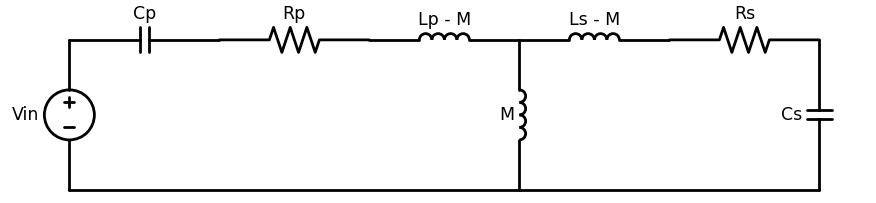

In [60]:
d = schemdraw.Drawing()
C = d.add(elm.Capacitor(label="Cp"))
d.add(elm.Resistor(label="Rp"))
L = d.add(elm.Inductor(label="Lp - M"))
M = d.add(elm.Inductor("down", label="M"))
d.add(elm.Line('left', tox=C.start))
d.add(elm.SourceV('up', label="Vin"))
d.add(elm.Inductor("right", label="Ls - M", at=L.end))
d.add(elm.Resistor(label="Rs"))
d.add(elm.Capacitor("down", label="Cs"))
d.add(elm.Line("left", tox=M.end))
d.draw()

In [36]:
i1, i2, i3 = symbols("i1 i2 i3")
vin, vout = symbols("vin vout")

Rp, Cp, Lp = symbols("Rp, Cp, Lp")
Rs, Cs, Ls = symbols("Rs, Cs, Ls")

M = symbols("M")
s = symbols("s")

Zp = 1/(s*Cp) + Rp + s*(Lp - M)
Zs = 1/(s*Cs) + Rs + s*(Ls - M)
Zm = s*M

eq1 = vin - Zp*i1 - Zm*i2
eq2 = Zm*i2 - i3*Zs
eq3 = i1 - i2 - i3

res = solve([eq1, eq2, eq3], [i1, i2, i3])
i3_sol = res[i3]

vout = i3_sol/(s*Cs)
Tf = vout/vin

Tf

Cp*M*s**2/(Cp*Cs*Lp*Ls*s**4 + Cp*Cs*Lp*Rs*s**3 + Cp*Cs*Ls*Rp*s**3 - Cp*Cs*M**2*s**4 + Cp*Cs*Rp*Rs*s**2 + Cp*Lp*s**2 + Cp*Rp*s + Cs*Ls*s**2 + Cs*Rs*s + 1)